In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv('./data/loans_income.csv')

In [14]:
loans_income = pd.Series(loans_income['x'])

In [15]:
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

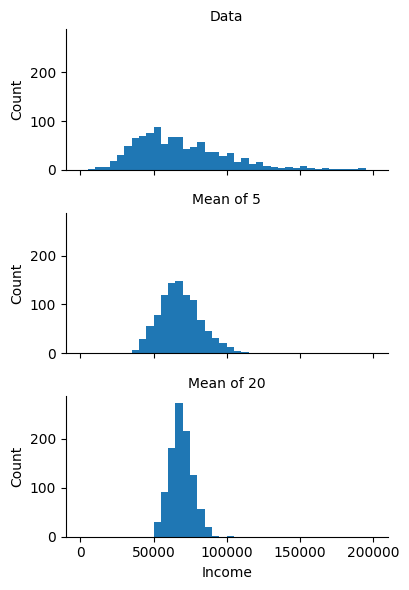

In [17]:
sample_data = pd.DataFrame({
  'income': loans_income.sample(1000),
  'type': 'Data',
})
sample_mean_05 = pd.DataFrame({
  'income': [loans_income.sample(5).mean() for _ in range(1000)],
  'type': 'Mean of 5'
})
sample_mean_20 = pd.DataFrame({
  'income': [loans_income.sample(20).mean() for _ in range(1000)],
  'type': 'Mean of 20'
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')



In [20]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
  sample = resample(loans_income)
  results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -77.76249999999709
std. error: 221.87064458074815


# 5. 분류

In [9]:
import pandas as pd

loan_data = pd.read_csv('data/loan_data.csv.gz')

In [10]:
loan_data

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [11]:
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: category
Categories (2, object): ['default', 'paid off']

In [12]:
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: category
Categories (2, object): ['paid off', 'default']

In [13]:
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

In [11]:
from sklearn.naive_bayes import MultinomialNB

predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='')
y = loan_data[outcome]

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(X, y)

MultinomialNB(alpha=0.01)

In [4]:
new_loan = X.loc[146:146, :]

In [5]:
new_loan

,credit_card,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,MORTGAGE,OWN,RENT,< 1 Year,> 1 Year
146,False,False,False,False,False,False,True,True,False,False,False,True


In [12]:
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan), columns=loan_data[outcome].cat.categories)

print('predicted probabilities', probabilities)

predicted class:  default
predicted probabilities     default  paid off
0  0.653696  0.346304


In [13]:
loan3000 = pd.read_csv('data/loan3000.csv')

loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'
X = loan3000[predictors]
y = loan3000[outcome]

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
pd.DataFrame(loan_lda.scalings_, index=X.columns)

,0
borrower_score,7.175839
payment_inc_ratio,-0.099676


In [15]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]), columns=loan_lda.classes_)
pred.head()

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048


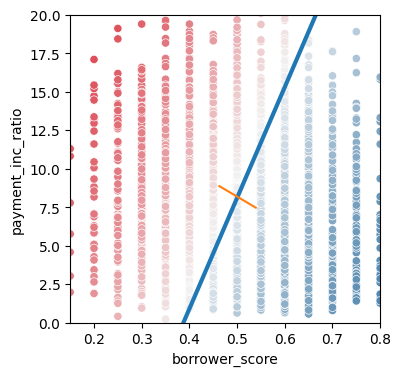

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

fig, ax = plt.subplots(figsize=(4, 4))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio', hue='default', data=lda_df, palette=sns.diverging_palette(240, 10, n=9, as_cmap=True), ax=ax, legend=False)

ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())

In [5]:
from sklearn.linear_model import LogisticRegression

predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', drop_first=True, dtype=int)
y = loan_data[outcome]

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

LogisticRegression(C=1e+42, solver='liblinear')

In [6]:
pred = pd.DataFrame(logit_reg.predict_log_proba(X), columns=loan_data[outcome].cat.categories)
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,-0.757850,-0.760423
std,0.378032,0.390419
min,-2.768873,-3.538865
25%,-0.985728,-0.977164
50%,-0.697366,-0.688946
75%,-0.472209,-0.467076
max,-0.029476,-0.064787


In [7]:
pred = pd.DataFrame(logit_reg.predict_proba(X), columns=loan_data[outcome].cat.categories)
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,0.500001,0.499999
std,0.167336,0.167336
min,0.062733,0.029046
25%,0.373167,0.376377
50%,0.497895,0.502105
75%,0.623623,0.626833
max,0.970954,0.937267


In [8]:
import statsmodels.api as sm

y_numbers = [1 if yi == 'default' else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1), family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                45342
Model:                            GLM   Df Residuals:                    45330
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28757.
Date:                Mon, 26 May 2025   Deviance:                       57515.
Time:                        00:33:42   Pearson chi2:                 4.54e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1112
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
payment_inc_ratio      0.0797      0.002     32.058      0.000       0.075       0.085
borrower_score        -4.6126      0.084    -55.203      0.000      -4.776      -4.449
debt_consolidation     0.2494      0.028      9.030      0.000       0.195       0.303
home_improvement       0.4077      0.047      8.747      0.000       0.316       0.499
major_purchase         0.2296      0.054      4.277      0.000       0.124       0.335
medical                0.5105      0.087      5.882      0.000       0.340       0.681
other                  0.6207      0.039     15.738      0.000       0.543       0.698
small_business         1.2153      0.063     19.192      0.000       1.091       1.339
OWN                    0.0483      0.038      1.271      0.204      -0.026       0.123
RENT                   0.1573      0.021      7.420      0.000       0.116       0.199
 > 1 Year             -0.3567      0.053     -6.779      0.000      -0.460      -0.254
const                  1.6381      0.074     22.224      0.000       1.494       1.783
======================================================================================
"""

In [9]:
import statsmodels.formula.api as smf

formula = ('outcome ~ bs(payment_inc_ratio, df=4) + purpose_ + home_ + emp_len_ + bs(borrower_score, df=4)')
model = smf.glm(formula=formula, data=loan_data, family=sm.families.Binomial())
results = model.fit()

In [11]:
import numpy as np

pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)],
                         [np.sum(false_pos), np.sum(true_neg)]],
                         index=['Y = default', 'Y = paid off'],
                         columns=['Yhat = default', 'Yhat = paid off'])
conf_mat

,Yhat = default,Yhat = paid off
Y = default,14336,8335
Y = paid off,8148,14523


In [12]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

conf_mat = confusion_matrix(y, logit_reg.predict(X))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

precision_recall_fscore_support(y, logit_reg.predict(X), labels=['default', 'paid off'])

Precision 0.6376089663760897
Recall 0.6323496978518812
Specificity 0.6405981209474659


(array([0.63760897, 0.63535742]),
 array([0.6323497 , 0.64059812]),
 array([0.63496844, 0.63796701]),
 array([22671, 22671], dtype=int64))

Text(0, 0.5, 'recall')

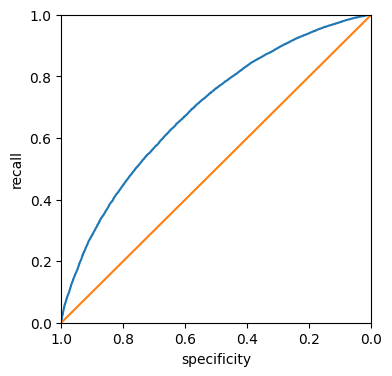

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:, 0], pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

In [14]:
from sklearn.metrics import roc_auc_score

print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))
print(roc_auc_score([1 if yi == 'default' else 0 for yi in y], logit_reg.predict_proba(X)[:, 0]))

0.691710795288669
0.6917108731135808


In [16]:
full_train_set = pd.read_csv('data/full_train_set.csv.gz')

print('percentage of loans in default: ', 100 * np.mean(full_train_set.outcome == 'default'))

percentage of loans in default:  18.894546909248504


In [17]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

X = pd.get_dummies(full_train_set[predictors], prefix='', prefix_sep='', drop_first=True)
y = full_train_set[outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y)
print('percentage of loans predicted to default: ', 100 * np.mean(full_model.predict(X) == 'default'))

percentage of loans predicted to default:  0.0


In [18]:
default_wt = 1 / np.mean(full_train_set.outcome == 'default')
wt = [default_wt if outcome == 'default' else 1 for outcome in full_train_set.outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y, sample_weight=wt)
print('percentage of loans predicted to default (weighting): ', 100 * np.mean(full_model.predict(X) == 'default'))

percentage of loans predicted to default (weighting):  61.43998933217766


# 6. 통계적 머신러닝

In [5]:
from sklearn.neighbors import KNeighborsClassifier

loan200 = pd.read_csv('data/loan200.csv')

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)

array(['paid off'], dtype=object)

In [6]:
predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

nbrs = knn.kneighbors(newloan)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
35536,1.47212,1.46,1686,10.0
33651,3.38178,6.37,1688,8.4
25863,2.36303,1.39,1691,3.5
42953,1.28160,7.14,1684,3.9
43599,4.12244,8.98,1684,7.2


In [7]:
from sklearn.preprocessing import StandardScaler

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2


In [9]:
loan_data

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [10]:
predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)

In [11]:
knn.fit(X, y)

loan_data['borrower_score'] = knn.predict_proba(X)[:, 1]
loan_data['borrower_score'].describe()

count    45342.000000
mean         0.498909
std          0.128728
min          0.050000
25%          0.400000
50%          0.500000
75%          0.600000
max          1.000000
Name: borrower_score, dtype: float64

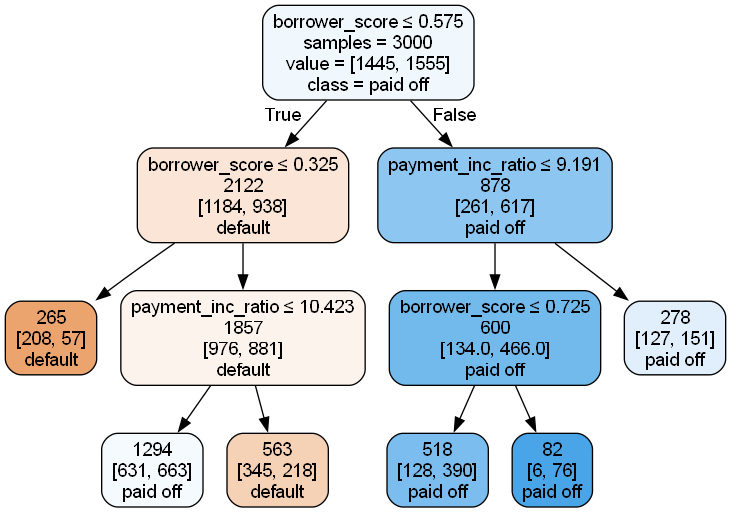

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

loan3000 = pd.read_csv('data/loan3000.csv')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.003)
loan_tree.fit(X, y)
plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)

In [3]:
from dmba import textDecisionTree

print(textDecisionTree(loan_tree))

node=0 test node: go to node 1 if 0 <= 0.5750000178813934 else to node 6
  node=1 test node: go to node 2 if 0 <= 0.32500000298023224 else to node 3
    node=2 leaf node: [[0.785, 0.215]]
    node=3 test node: go to node 4 if 1 <= 10.42264986038208 else to node 5
      node=4 leaf node: [[0.488, 0.512]]
      node=5 leaf node: [[0.613, 0.387]]
  node=6 test node: go to node 7 if 1 <= 9.19082498550415 else to node 10
    node=7 test node: go to node 8 if 0 <= 0.7249999940395355 else to node 9
      node=8 leaf node: [[0.247, 0.753]]
      node=9 leaf node: [[0.073, 0.927]]
    node=10 leaf node: [[0.457, 0.543]]


In [4]:
from sklearn.ensemble import RandomForestClassifier

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators=500, random_state=1, oob_score=True)
rf.fit(X, y)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=1)

<Axes: xlabel='n'>

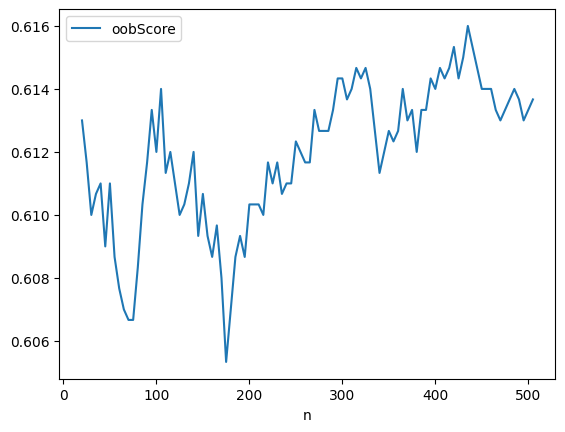

In [5]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
  rf = RandomForestClassifier(n_estimators=n, criterion='entropy', max_depth=5, random_state=1, oob_score=True)
  rf.fit(X, y)
  oobScores.append(rf.oob_score_)

df = pd.DataFrame({ 'n': n_estimator, 'oobScore': oobScores})
df.plot(x='n', y='oobScore')

In [6]:
predictions = X.copy()
predictions['prediction'] = rf.predict(X)
predictions.head()

,borrower_score,payment_inc_ratio,prediction
0,0.40,5.11135,default
1,0.40,5.43165,default
2,0.70,9.23003,paid off
3,0.40,2.33482,paid off
4,0.45,12.10320,default


Text(0, 0.5, 'payment_inc_ratio')

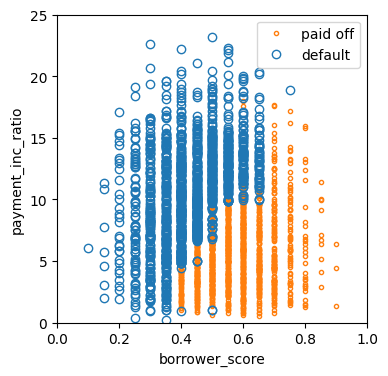

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

predictions.loc[predictions.prediction=='paid off'].plot(x='borrower_score', y='payment_inc_ratio', style='.', markerfacecolor='none', markeredgecolor='C1', ax=ax)
predictions.loc[predictions.prediction=='default'].plot(x='borrower_score', y='payment_inc_ratio', style='o', markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default'])
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

In [14]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade', 'emp_length', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = loan_data[outcome]

rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [15]:
importances = rf_all.feature_importances_

In [16]:
importances

array([0.07998995, 0.09326785, 0.0991315 , 0.10579059, 0.0942328 ,
       0.09759648, 0.01099523, 0.00871262, 0.06732547, 0.09689576,
       0.05253653, 0.08750636, 0.0206617 , 0.00748052, 0.00766099,
       0.00364251, 0.0013268 , 0.0025287 , 0.00167231, 0.00142362,
       0.00443443, 0.00331226, 0.00109218, 0.00178106, 0.0075586 ,
       0.00391476, 0.00354768, 0.00166452, 0.00486864, 0.00335877,
       0.00751943, 0.01316393, 0.00340548])

In [19]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)

for _ in range(3):
  train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3)
  rf.fit(train_X, train_y)
  acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
  for column in X.columns:
    X_t = valid_X.copy()
    X_t[column] = np.random.permutation(X_t[column].values)
    shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
    scores[column].append((acc-shuff_acc)/acc)

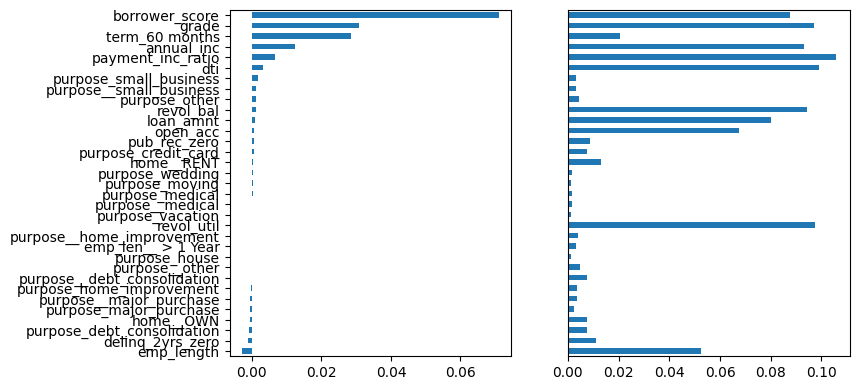

In [20]:
df = pd.DataFrame({
  'feature': X.columns,
  'Accuracy decrease': [np.mean(scores[column]) for column in X.columns],
  'Gini decrease': rf_all.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(8, 4.5))
ax = df.plot(kind='barh', x = 'feature', y='Accuracy decrease', legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

In [22]:
from xgboost import XGBClassifier

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = pd.Series([1 if o == 'default' else 0 for o in loan3000[outcome]])

xgb = XGBClassifier(objective='binary:logistic', subsample=0.63)
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.63, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=3, max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, ...)

In [23]:
xgb_df = X.copy()
xgb_df['prediction'] = ['default' if p == 1 else 'paid off' for p in xgb.predict(X)]
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]
print(xgb_df.head())

   borrower_score  payment_inc_ratio prediction  prob_default
0            0.40            5.11135   paid off      0.732272
1            0.40            5.43165    default      0.326562
2            0.70            9.23003    default      0.381339
3            0.40            2.33482   paid off      0.848719
4            0.45           12.10320    default      0.082047


Text(0, 0.5, 'payment_inc_ratio')

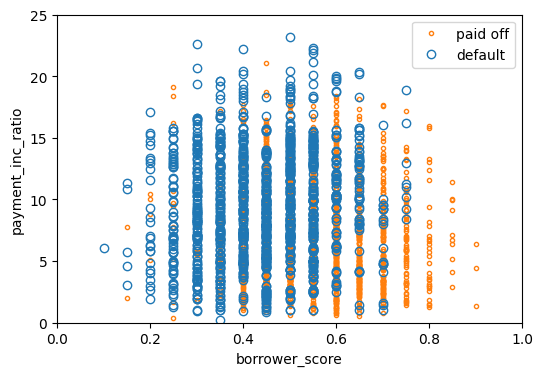

In [25]:
fig, ax = plt.subplots(figsize=(6,4))

xgb_df.loc[xgb_df.prediction=='paid off'].plot(
  x='borrower_score', y='payment_inc_ratio', style='.', markerfacecolor='none', markeredgecolor='C1', ax=ax
)
xgb_df.loc[xgb_df.prediction=='default'].plot(
  x='borrower_score', y='payment_inc_ratio', style='o', markerfacecolor='none', markeredgecolor='C0', ax=ax
)
ax.legend(['paid off', 'default'])
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

In [26]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade', 'emp_length', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6, reg_lambda=0, learning_rate=0.3, subsample=1)
xgb_default.fit(train_X, train_y)

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

default:  0.3534


In [27]:
xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6, reg_lambda=1000, learning_rate=0.1, subsample=0.63)
xgb_penalty.fit(train_X, train_y)
pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

penalty:  0.3252


In [30]:
results = []
for i in range(1, 250):
  train_default = xgb_default.predict_proba(train_X, iteration_range=(0,i))[:, 1]
  train_penalty = xgb_penalty.predict_proba(train_X, iteration_range=(0,i))[:, 1]
  pred_default = xgb_default.predict_proba(valid_X, iteration_range=(0,i))[:, 1]
  pred_penalty = xgb_penalty.predict_proba(valid_X, iteration_range=(0,i))[:, 1]
  results.append({
    'iterations': i,
    'default train': np.mean(abs(train_y - train_default) > 0.5),
    'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
    'default test': np.mean(abs(valid_y - pred_default) > 0.5),
    'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
  })

results = pd.DataFrame(results)
results.head()

,iterations,default train,penalty train,default test,penalty test
0,1,0.338181,0.346472,0.3491,0.3461
1,2,0.331277,0.337983,0.3391,0.3368
2,3,0.329099,0.336512,0.3373,0.3387
3,4,0.324430,0.336568,0.3395,0.3406
4,5,0.321063,0.337983,0.3386,0.3405


<Axes: xlabel='iterations'>

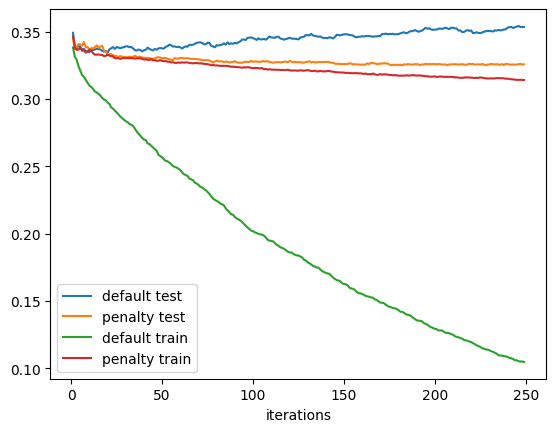

In [31]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)

In [32]:
from itertools import product

idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
  xgb = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=max_depth, learning_rate=eta)
  cv_error = []
  for k in range(5):
    fold_idx = idx == k
    train_X = X.loc[~fold_idx]
    train_y = y[~fold_idx]
    valid_X = X.loc[fold_idx]
    valid_y = y[fold_idx]

    xgb.fit(train_X, train_y)
    pred = xgb.predict_proba(valid_X)[:, 1]
    cv_error.append(np.mean(abs(valid_y - pred) > 0.5))

  error.append({
    'eta': eta,
    'max_depth': max_depth,
    'avg_error': np.mean(cv_error)
  })
  print(error[-1])

errors = pd.DataFrame(error)
errors

{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.3291633131181941}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.3366886471726317}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.34707732031234684}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.3386122272793761}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.3709702865532186}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.3739169697289782}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.3519345570943921}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.3886274748465941}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.3823756498560344}


,eta,max_depth,avg_error
0,0.1,3,0.329163
1,0.1,6,0.336689
2,0.1,9,0.347077
3,0.5,3,0.338612
4,0.5,6,0.370970
5,0.5,9,0.373917
6,0.9,3,0.351935
7,0.9,6,0.388627
8,0.9,9,0.382376


# 7. 비지도 학습

In [1]:
import pandas as pd

sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]

In [2]:
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
loadings

,XOM,CVX
0,0.664711,0.747101
1,0.747101,-0.664711


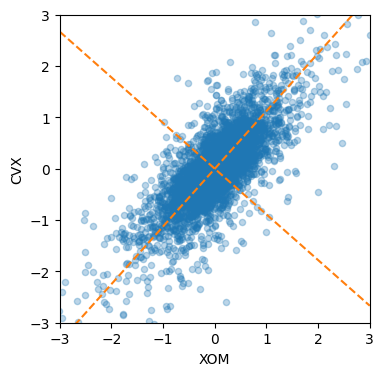

In [3]:
import numpy as np

def abline(slope, intercept, ax):
  x_vals = np.array(ax.get_xlim())
  return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax), '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax), '--', color='C1')

Text(0.5, 0, 'Component')

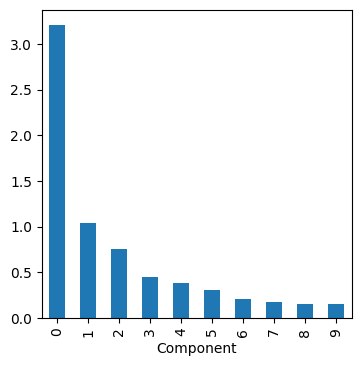

In [4]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM','SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

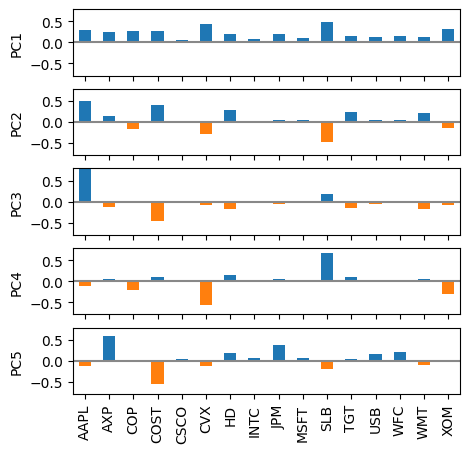

In [6]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
  pc_loadings = loadings.loc[i, :]
  colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
  ax.axhline(color='#888888')
  pc_loadings.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'PC{i+1}')
  ax.set_ylim(-maxPC, maxPC)

In [7]:
from sklearn.cluster import KMeans

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4).fit(df)

In [8]:
df['clusters'] = kmeans.labels_

In [9]:
df.head()

,XOM,CVX,clusters
2011-01-03,0.736805,0.240681,3
2011-01-04,0.168668,-0.584516,1
2011-01-05,0.026631,0.446985,3
2011-01-06,0.248558,-0.919751,1
2011-01-07,0.337329,0.180511,3


In [10]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
centers

,XOM,CVX
0,0.927032,1.346412
1,-0.330814,-0.574398
2,-1.144397,-1.757796
3,0.231540,0.316965


<Axes: xlabel='XOM', ylabel='CVX'>

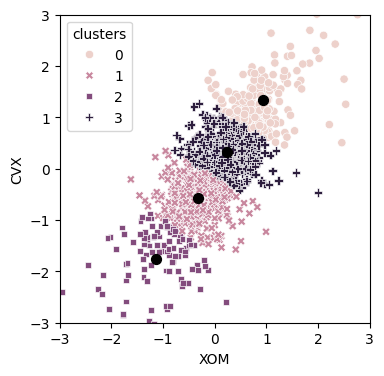

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='clusters', style='clusters', ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

In [14]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5).fit(top_sp)

In [15]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 413, 4: 212, 0: 186, 1: 204, 3: 116})

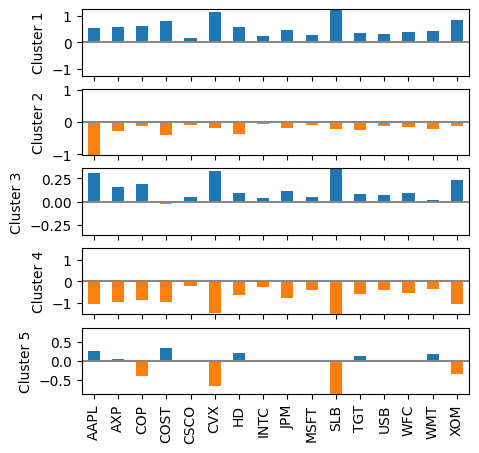

In [16]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
  center = centers.loc[i, :]
  maxPC = 1.01 * np.max(np.max(np.abs(center)))
  colors = ['C0' if l > 0 else 'C1' for l in center]
  ax.axhline(color='#888888')
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i + 1}')
  ax.set_ylim(-maxPC, maxPC)

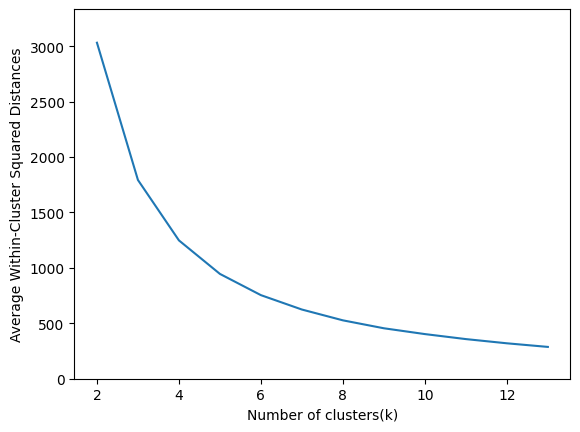

In [17]:
inertia = []
for n_clusters in range(2, 14):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(top_sp)
  inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

In [ ]:
from scipy.cluster.hierarchy import linkage

syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()

Z = linkage(df, method='complete')

In [19]:
Z

array([[ 14.        ,  15.        ,   8.59490731,   2.        ],
       [  5.        ,   9.        ,   8.70726095,   2.        ],
       [ 11.        ,  19.        ,  11.43861911,   3.        ],
       [ 18.        ,  20.        ,  13.54055199,   5.        ],
       [ 10.        ,  21.        ,  17.54262662,   6.        ],
       [ 13.        ,  16.        ,  18.30670621,   2.        ],
       [  3.        ,  17.        ,  18.96087019,   2.        ],
       [ 22.        ,  23.        ,  21.31534597,   8.        ],
       [  6.        ,  24.        ,  22.85872694,   3.        ],
       [  2.        ,  25.        ,  24.02785309,   9.        ],
       [  8.        ,  27.        ,  25.49676797,  10.        ],
       [  4.        ,  28.        ,  29.1889513 ,  11.        ],
       [ 12.        ,  26.        ,  31.15301738,   4.        ],
       [  0.        ,  29.        ,  38.98012839,  12.        ],
       [ 30.        ,  31.        ,  43.24155434,  16.        ],
       [  1.        ,  32

Text(0, 0.5, 'distance')

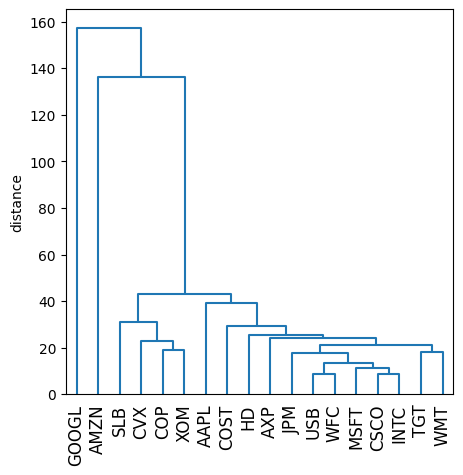

In [20]:
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=list(df.index), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [22]:
from scipy.cluster.hierarchy import fcluster

memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
  print(f'{key} : {", ".join(item.index)}')

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


In [23]:
from sklearn.mixture import GaussianMixture

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components=2).fit(df)
mclust.bic(df)

4589.320317053261

(-3.0, 3.0)

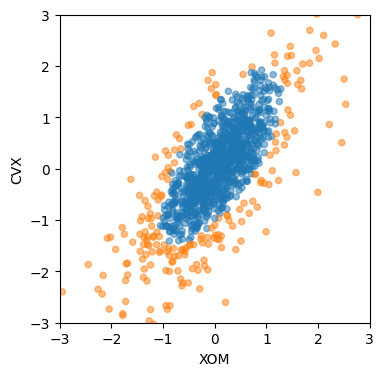

In [24]:
fig, ax = plt.subplots(figsize=(4, 4))
colors = [f'C{c}' for c in mclust.predict(df)]
df.plot.scatter(x='XOM', y='CVX', c=colors, alpha=0.5, ax=ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

In [25]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)

Mean
[[ 0.0709161   0.10228006]
 [-0.05074943 -0.21539465]]
Covariances
[[[0.27074158 0.27800893]
  [0.27800893 0.5212865 ]]

 [[0.98668327 0.99350046]
  [0.99350046 1.69695919]]]


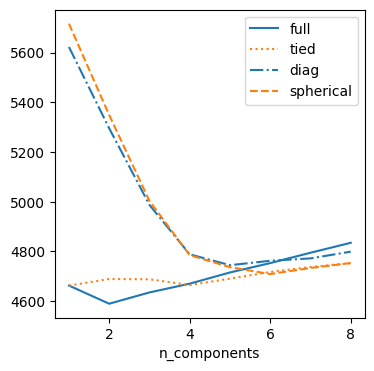

In [26]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(df)
    results.append({
      'bic': mclust.bic(df),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-', 'C1:', 'C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
  subset = results.loc[results.covariance_type == covariance_type, :]
  subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type, kind='line', style=styles[i])

In [28]:
loan_data = pd.read_csv('data/loan_data.csv.gz')

defaults = loan_data.loc[loan_data['outcome'] == 'default']

In [29]:
columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util']

df = defaults[columns]
kmeans = KMeans(n_clusters=4, random_state=1).fit(df)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers['size'] = [counts[i] for i in range(4)]
centers

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,size
0,17809.760881,78669.452556,18933.405997,11.594003,17.016428,62.183810,7906
1,21444.318867,148736.057263,33152.689572,12.376733,13.831145,63.151084,1654
2,24290.909091,409746.465909,84710.988636,13.431818,8.148636,60.015647,88
3,10274.160906,41241.205530,9950.095008,9.480338,17.718588,57.903425,13023


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df0 = scaler.fit_transform(df * 1.0)

kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=columns)
centers['size'] = [counts[i] for i in range(4)]
centers

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util,size
0,13484.728906,55907.993263,16435.803337,14.322265,24.211535,59.463608,6244
1,25950.205142,116834.142232,32945.972921,12.396335,16.165914,66.123542,3670
2,10507.283093,51117.994063,11635.285252,7.509513,15.931561,77.795077,7397
3,10324.846369,53456.824767,6054.819926,8.664618,11.312983,30.999874,5360


Text(0.5, 0, 'Component')

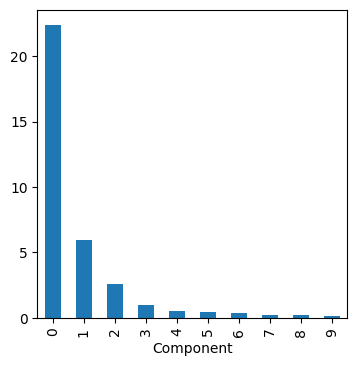

In [31]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]

sp_pca1 = PCA()
sp_pca1.fit(top_sp1)

explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4,4))
ax.set_xlabel('Component')

In [32]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :], columns=top_sp1.columns)
loadings.transpose()

,0,1
GOOGL,0.857310,-0.477873
AMZN,0.444728,0.874149
AAPL,0.071627,0.020802
MSFT,0.036002,0.006204
CSCO,0.029205,0.003045
INTC,0.026666,0.006069
CVX,0.089548,0.037420
XOM,0.080336,0.020511
SLB,0.110218,0.030356
COP,0.057739,0.024117


In [33]:
columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = pd.get_dummies(defaults[columns])

scaler = StandardScaler()
df0 = scaler.fit_transform(df * 1.0)
kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns)
centers

,dti,payment_inc_ratio,pub_rec_zero,home__MORTGAGE,home__OWN,home__RENT
0,21.431365,12.354001,0.943315,6.605827e-15,-9.159340e-16,1.000000e+00
1,12.743276,5.918701,0.900372,7.382983e-15,-9.992007e-16,1.000000e+00
2,17.339786,8.353535,0.905716,1.000000e+00,-1.304512e-15,1.354472e-14
3,17.197993,9.266666,0.917903,-1.443290e-15,1.000000e+00,8.326673e-16
